<a href="https://colab.research.google.com/github/GavinEBinder/Credit-Card-Fraud-Detection-ML-Project/blob/main/CreditCardFraudDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, classification_report
from sklearn.metrics import roc_curve, auc
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
import warnings
from sklearn import metrics
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv('/content/creditcard.csv')
print(df.shape)
df.head()

(284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Above, we load the CSV (dataset) and print its shape and the first 5 rows to get a basic idea of what our data looks like.

In [5]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Furthermore, we get metrics like our mean, standard deviation, min/max values for each feature.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

For each of our features, all but the "Class" feature are float and the "Class" feature is int. Also, all features are non-null, so their is no need to remove null values.

In [7]:
counts = df['Class'].value_counts()
print(counts)

Class
0    284315
1       492
Name: count, dtype: int64


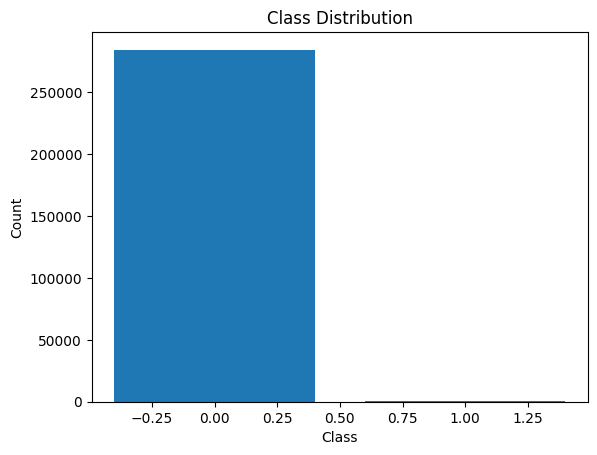

In [8]:
plt.bar(counts.index, counts)
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

Very little fraud cases (1 in the feature class). Far too imbalanced, so any predictive model would likely assume not fraud.

No information on what V features stand for, as it is "confidential" information.

Plenty of our features have outliers. (For example, V9 mean is e-15 while max is e+01)

We need to scale the Amount and Time features as all other features are already scaled. Because this data has outliers, we need to use a Robust scaler, [as all other scalers are sensitive to outliers](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html)

In [9]:
from sklearn import preprocessing
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
robust_time = scaler.fit_transform(df.Time.values.reshape(-1,1))
robust_amount = scaler.fit_transform(df.Amount.values.reshape(-1,1))
df['Time'] = robust_time
df['Amount'] = robust_amount
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,1.783274,0
1,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.269825,0
2,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,4.983721,0
3,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,1.418291,0
4,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.670579,0


Now, we need to balance our dataset, so that a classification model doesn't just predict non fraud  cases.

In [10]:
from sklearn.utils import resample

# create two seperate variables to store fraud and not fraud data
df_notfraud = df[df['Class'] == 0]
df_fraud = df[df['Class'] == 1]

# resample the not fraud data to match the fraud data
df_notfraud_sample = resample(df_notfraud, replace=True, n_samples=492, random_state=42)

# combine the two dataframes
df = pd.concat([df_notfraud_sample, df_fraud])
print(df['Class'].value_counts())

df.head()

Class
0    492
1    492
Name: count, dtype: int64


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
122207,-0.096535,-1.004046,1.053270,1.093808,-0.591014,0.516087,-0.415980,0.476134,0.305124,-0.844857,...,-0.198036,-0.798085,-0.105299,-0.624258,-0.033219,-0.054535,-0.066880,0.004584,-0.098512,0
147150,0.040990,-0.422831,0.239428,1.512375,-1.075881,-0.809157,-0.089498,0.838381,-0.463100,-0.698558,...,-0.568205,-0.860065,-0.002557,-0.079295,-0.594139,-0.644110,-0.140223,-0.106076,1.421784,0
132194,-0.056380,-0.138855,-0.976921,0.883736,-3.393556,1.142488,3.914621,-1.119220,0.869570,-1.539373,...,-0.228985,-0.147826,-0.093426,0.977747,-0.269920,-0.413884,0.018587,-0.078387,-0.027947,0
259649,0.875504,0.256621,0.223809,0.975735,-0.220988,-0.270464,0.568080,-0.394989,-0.637367,0.416232,...,1.080174,0.763228,-0.220929,0.824970,0.789579,-0.064883,0.223809,0.257101,0.250821,0
120126,-0.105429,-1.438013,1.298178,0.909734,-0.495798,0.255640,-0.766527,0.449792,0.361424,-0.492433,...,-0.141175,-0.479615,0.105791,0.038759,-0.299486,-0.087374,-0.033205,0.108152,-0.237686,0


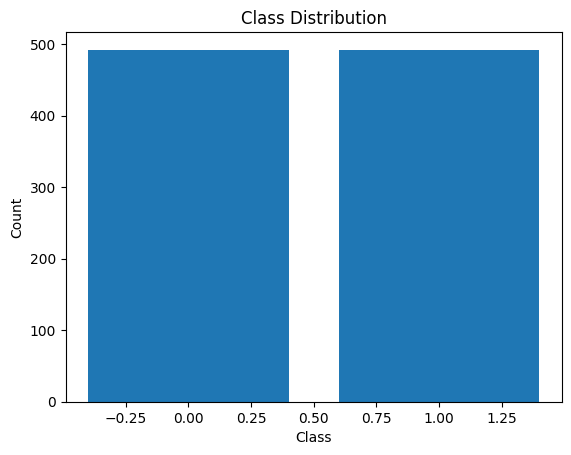

In [11]:
balanced_counts = df['Class'].value_counts()
plt.bar(balanced_counts.index, balanced_counts)
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

We now want to find the correlations between the features and whether it is credit card fraud or not

In [12]:
correlation_matrix = df.corr()[['Class']]
print(correlation_matrix)

           Class
Time   -0.129097
V1     -0.418065
V2      0.474994
V3     -0.568405
V4      0.717355
V5     -0.376012
V6     -0.417675
V7     -0.478154
V8      0.061306
V9     -0.558071
V10    -0.625459
V11     0.687511
V12    -0.685276
V13    -0.054698
V14    -0.751736
V15    -0.063861
V16    -0.595832
V17    -0.556108
V18    -0.470201
V19     0.267418
V20     0.200866
V21     0.120510
V22     0.009022
V23    -0.022509
V24    -0.092291
V25    -0.003839
V26     0.077116
V27     0.095637
V28     0.092118
Amount  0.095183
Class   1.000000


The most positive correlation are V2, V4, and V11

The most negative correlation are V10, V12, and V14

The idea now is to get rid of the outliers in our most negatively correlated and most positively correlated features. This is because outliers tend to affect the performance of models more on highly correlated features (no matter if they are positively or negatively correlated). To get rid of these outliers, we use the interquartile range function.

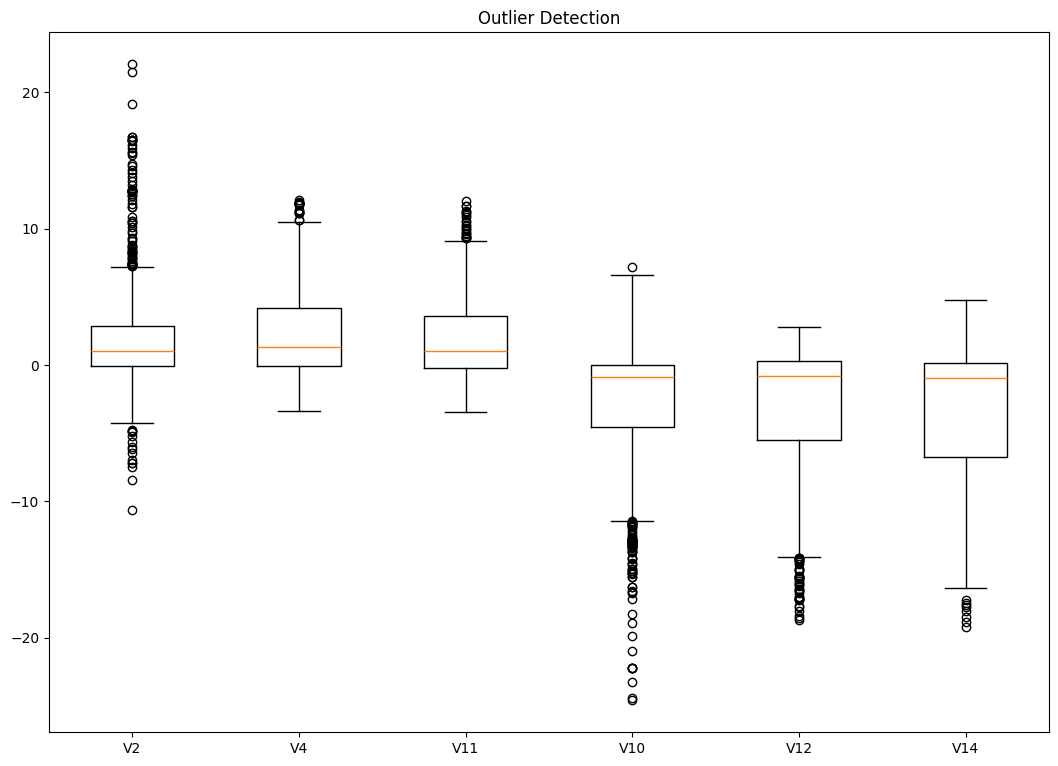

In [13]:
x = [df.V2, df.V4, df.V11, df.V10, df.V12, df.V14]
y = ['V2', 'V4', 'V11', 'V10', 'V12', 'V14']
fig = plt.figure(figsize =(10, 7))
ax = fig.add_axes([0, 0, 1, 1])
ax.boxplot(x)
ax.set_xticklabels(y)
plt.title('Outlier Detection')
plt.show()

In [14]:
print("Before removing outliers: ")
print(df[y].describe())
for feature in y:
  print(f"{feature}:")
  print(f"1st percentile: {np.percentile(df[feature], 1)}")
  print(f"99th percentile: {np.percentile(df[feature], 99)}\n")

Before removing outliers: 
               V2          V4         V11         V10         V12         V14
count  984.000000  984.000000  984.000000  984.000000  984.000000  984.000000
mean     1.897401    2.266058    1.886460   -2.844051   -3.103640   -3.450770
std      3.636377    3.174338    2.784952    4.531509    4.607424    4.686143
min    -10.602409   -3.393556   -3.416387  -24.588262  -18.683715  -19.214325
25%     -0.061477   -0.089269   -0.191443   -4.572043   -5.495221   -6.721799
50%      0.993091    1.305695    1.061915   -0.863881   -0.776759   -0.983169
75%      2.845852    4.175332    3.586130   -0.000995    0.260526    0.155652
max     22.057729   12.114672   12.018913    7.176214    2.814171    4.754715
V2:
1st percentile: -5.279616386780373
99th percentile: 16.20310136044651

V4:
1st percentile: -2.5606845566304606
99th percentile: 11.74572265450785

V11:
1st percentile: -1.880705112317425
99th percentile: 10.306512114596767

V10:
1st percentile: -18.38032095125615
99t

In [15]:
for feature in y:
  q1 = np.percentile(df[feature], 25)
  q3 = np.percentile(df[feature], 75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5 * iqr
  upper_bound = q3 + 1.5 * iqr
  df = df[(df[feature] >= lower_bound) & (df[feature] <= upper_bound)]

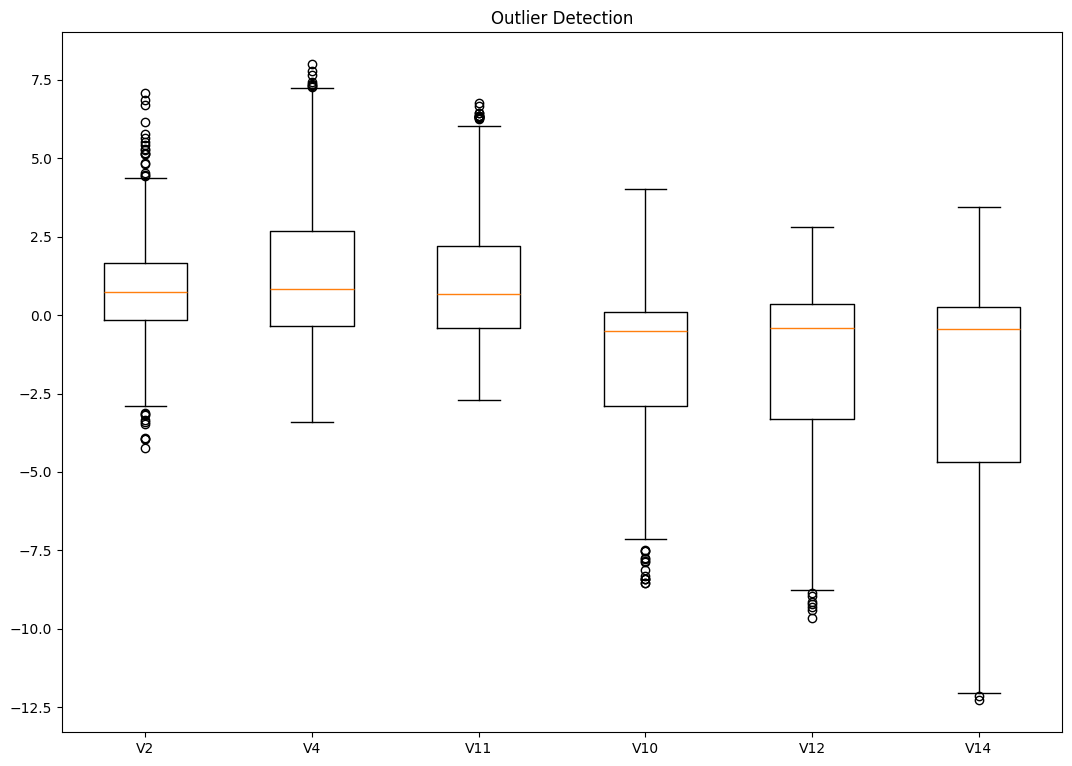

In [16]:
y = ['V2', 'V4', 'V11', 'V10', 'V12', 'V14']
x = [df.V2, df.V4, df.V11, df.V10, df.V12, df.V14]
fig = plt.figure(figsize =(10, 7))
ax = fig.add_axes([0, 0, 1, 1])
ax.boxplot(x)
ax.set_xticklabels(y)
plt.title('Outlier Detection')
plt.show()

In [17]:
print("After removing outliers: ")
print(df[y].describe())
for feature in y:
  print(f"{feature}:")
  print(f"1st percentile: {np.percentile(df[feature], 1)}")
  print(f"99th percentile: {np.percentile(df[feature], 99)}\n")

After removing outliers: 
               V2          V4         V11         V10         V12         V14
count  815.000000  815.000000  815.000000  815.000000  815.000000  815.000000
mean     0.859805    1.309899    1.065161   -1.397949   -1.616748   -2.168548
std      1.602054    2.238080    1.921947    2.294447    2.744575    3.470900
min     -4.234056   -3.393556   -2.717146   -8.537758   -9.656606  -12.289133
25%     -0.169774   -0.347255   -0.417336   -2.895121   -3.320824   -4.683713
50%      0.722614    0.825750    0.663102   -0.502946   -0.408104   -0.457953
75%      1.658804    2.692022    2.211721    0.105082    0.351187    0.272904
max      7.092197    8.005351    6.754625    4.031435    2.814171    3.442422
V2:
1st percentile: -3.1527028743695187
99th percentile: 5.306232094795021

V4:
1st percentile: -2.6750531684777554
99th percentile: 7.198340071812416

V11:
1st percentile: -1.898686374991668
99th percentile: 6.315206483208059

V10:
1st percentile: -7.82624717795889
99th 

In [18]:
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(df.drop('Class', axis=1))

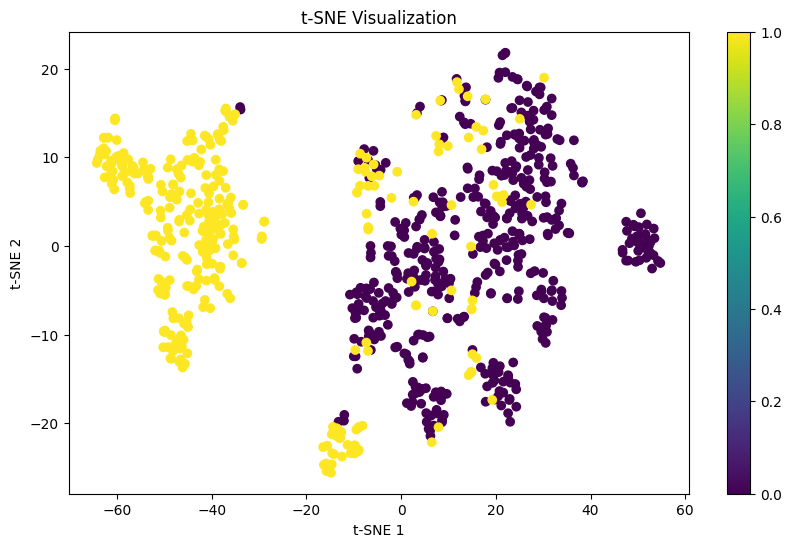

In [19]:
plt.figure(figsize=(10, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=df['Class'], cmap='viridis')  # Replace 'Class' with label column if available
plt.colorbar()
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.title('t-SNE Visualization')
plt.show()

**Note: the models trained below are just samples, I have not done any form of tuning.**

In [20]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
X = df.drop('Class', axis=1)
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
# initializing classifiers
knn = KNeighborsClassifier()
lr = LogisticRegression()
svc = SVC()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()

In [22]:
# knn prediction
from sklearn.model_selection import cross_val_score
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print('For KNN:')
print(classification_report(y_test, y_pred))

For KNN:
              precision    recall  f1-score   support

           0       0.93      0.96      0.94        95
           1       0.94      0.90      0.92        68

    accuracy                           0.93       163
   macro avg       0.93      0.93      0.93       163
weighted avg       0.93      0.93      0.93       163



With no scaling, balancing, or outlier removal:

took 1 minute

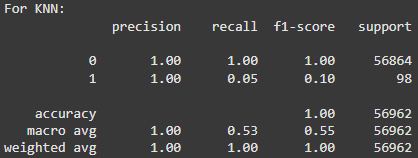

Scaling only:

Took 2 minutes.

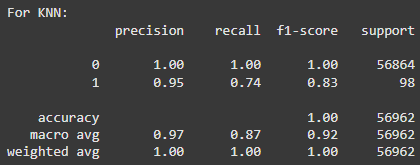

Scaling and balancing:

Took < 1 second.

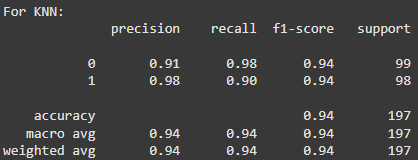

Scaling, balancing, and outliers removed:

took < 1 second.



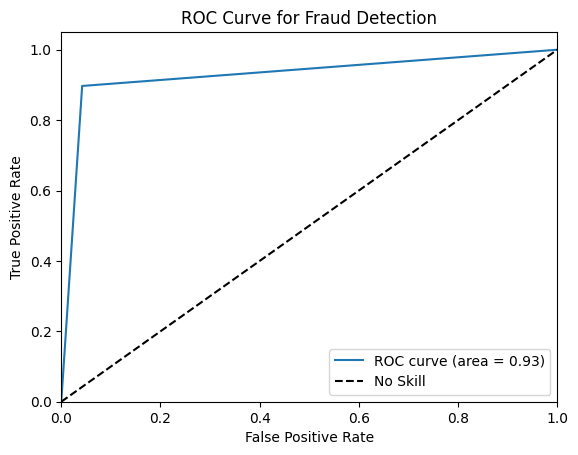

In [23]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Fraud Detection')
plt.legend()
plt.show()

In [24]:
# Logistic Regression prediction
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print('For LR:')
print(classification_report(y_test, y_pred))

For LR:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97        95
           1       0.98      0.93      0.95        68

    accuracy                           0.96       163
   macro avg       0.97      0.96      0.96       163
weighted avg       0.96      0.96      0.96       163



With no scaling, balancing, or outlier removal:

took 8 seconds

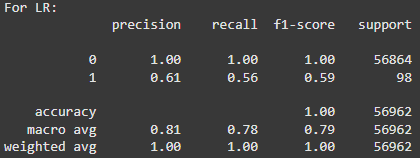

Scaling only:

took 3 seconds

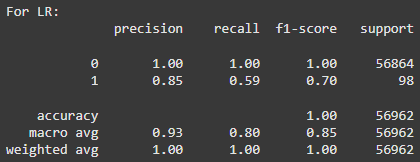

Scaling and Balancing:

Took < 1 second.

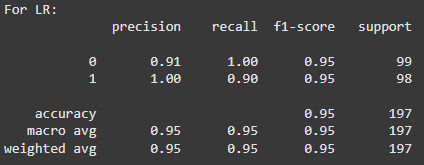

Scaling, balancing, and outliers removed:

took < 1 second.



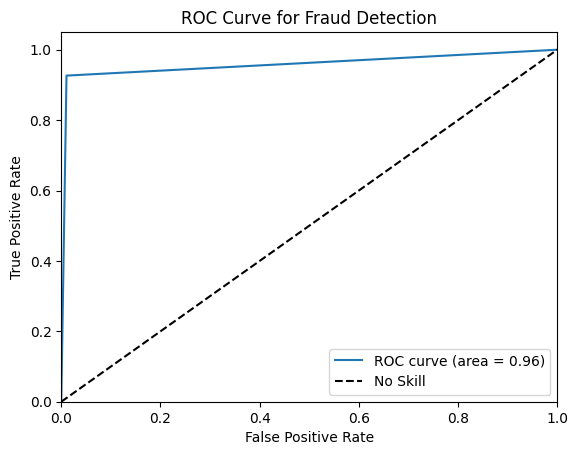

In [25]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Fraud Detection')
plt.legend()
plt.show()

In [26]:
# SVC prediction
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
print('For svc:')
print(classification_report(y_test, y_pred))

For svc:
              precision    recall  f1-score   support

           0       0.92      0.96      0.94        95
           1       0.94      0.88      0.91        68

    accuracy                           0.93       163
   macro avg       0.93      0.92      0.92       163
weighted avg       0.93      0.93      0.93       163



With no scaling, balancing, or outlier removal:

Took 29 seconds.

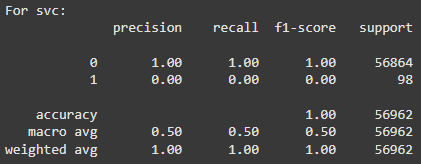

Scaling only:

Took 6 minutes

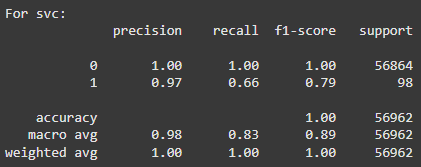

Scaling and balancing:

Took < 1 second.

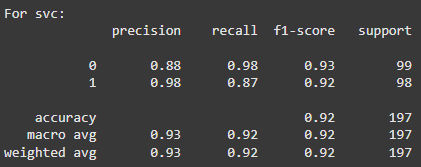

Scaling, balancing, and outliers removed:

took < 1 second.



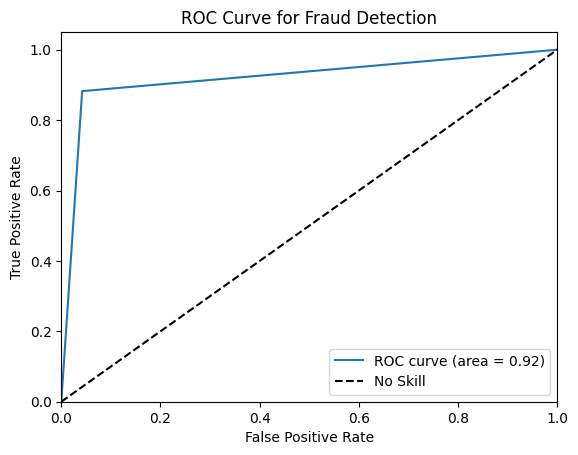

In [27]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Fraud Detection')
plt.legend()
plt.show()

In [28]:
# Decision Tree prediction
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
print('For dt:')
print(classification_report(y_test, y_pred))

For dt:
              precision    recall  f1-score   support

           0       0.91      0.91      0.91        95
           1       0.87      0.88      0.88        68

    accuracy                           0.90       163
   macro avg       0.89      0.89      0.89       163
weighted avg       0.90      0.90      0.90       163



With no scaling, balancing, or outlier removal:

Took 49 seconds.

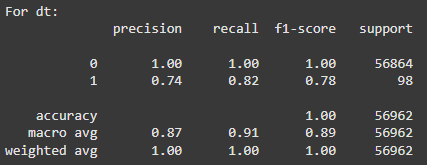

Scaling only:

took 36 seconds

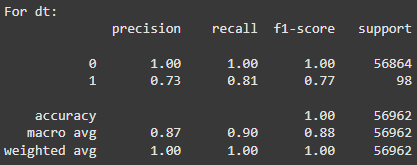

scaling and balancing:

Took < 1 second.

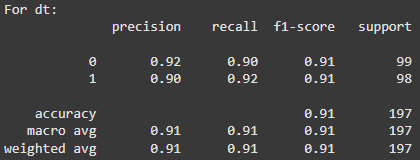

Scaling, balancing, and outliers removed:

took < 1 second.



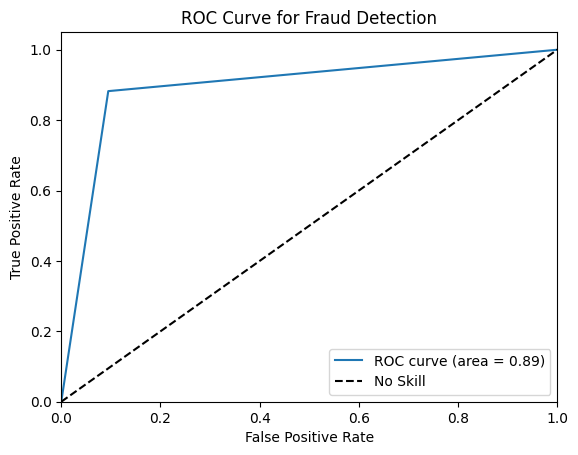

In [29]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Fraud Detection')
plt.legend()
plt.show()

In [30]:
# Random Forest prediction
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print('For rf:')
print(classification_report(y_test, y_pred))

For rf:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96        95
           1       0.97      0.91      0.94        68

    accuracy                           0.95       163
   macro avg       0.95      0.95      0.95       163
weighted avg       0.95      0.95      0.95       163



With no scaling, balancing, or outlier removal:

Took 7 minutes.

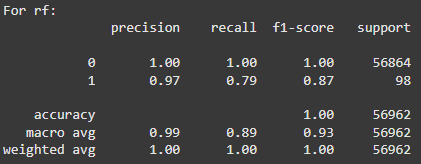

Scaling Only:

took 7 mins.

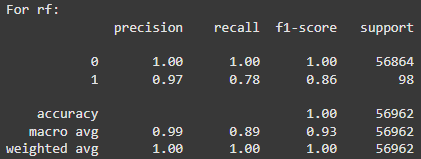

Scaling and balancing:

Took < 1 second.

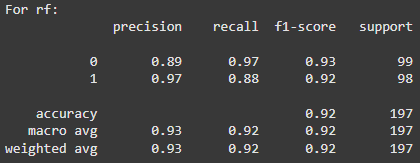

Scaling, balancing, and outliers removed:

took < 1 second.



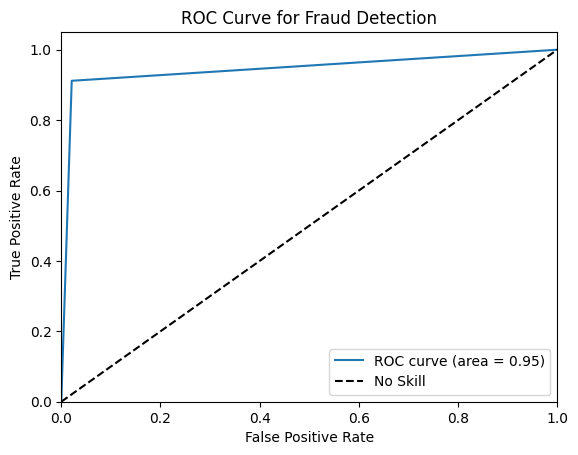

In [31]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Fraud Detection')
plt.legend()
plt.show()